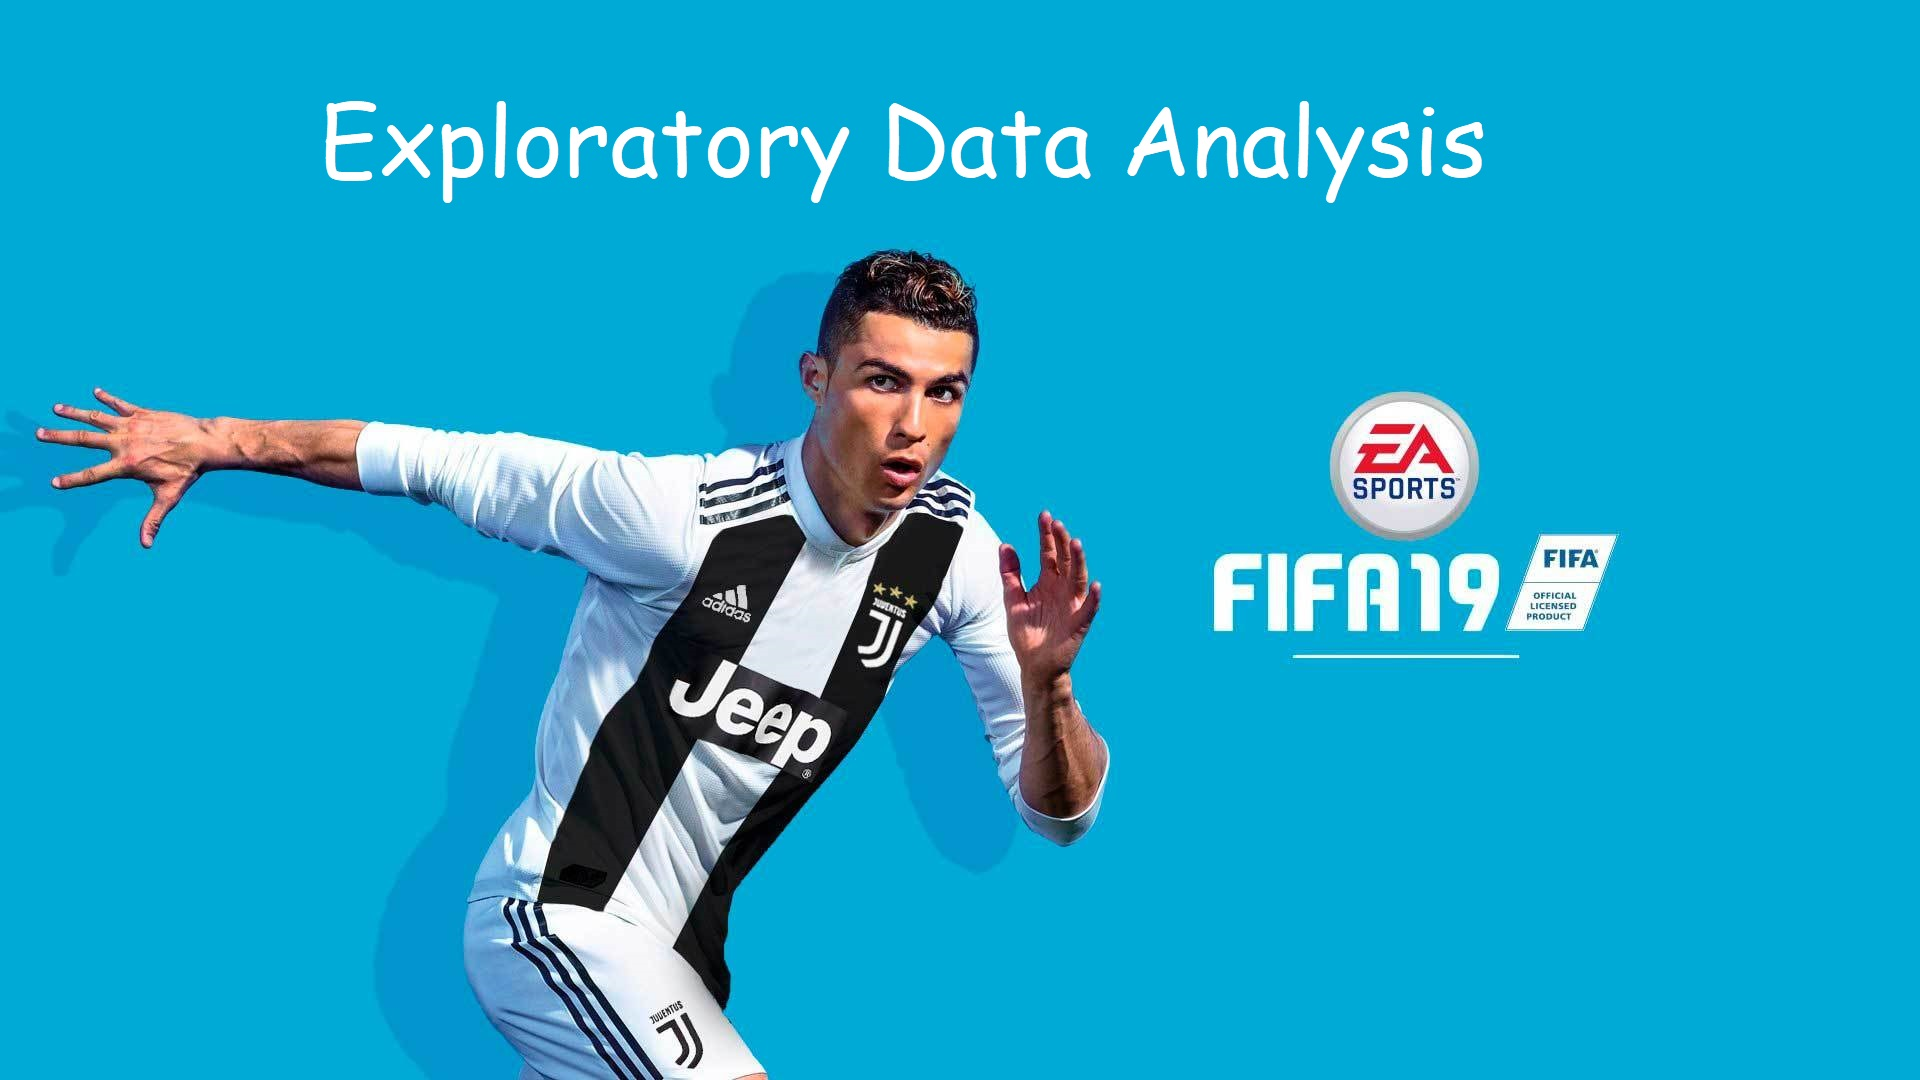

# **Setting environment and importing required libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa19/data.csv


# **Loading the dataset**

In [2]:
df1 = pd.read_csv("../input/fifa19/data.csv")
df1.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# **Describing the dataset**

In [3]:
df1.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

# **Cleaning the data**

**Removing ["Unnamed: 0", "Photo", "Flag", "Club Logo"]column**

In [5]:
df1.drop(columns=["Unnamed: 0", "Photo", "Flag", "Club Logo"], inplace=True)
df1.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
df1["Value"] = df1["Value"].replace(["M","K","€"],"",regex=True)
df1["Wage"] = df1["Wage"].replace(["M","K","€"],"",regex=True)
df1["Release Clause"] = df1["Release Clause"].replace(["M","K","€"],"",regex=True)
df1["Value"] = df1["Value"].astype("float")
df1["Wage"] = df1["Wage"].astype("float")
df1.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565.0,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,405.0,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,290.0,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,193080,De Gea,27,Spain,91,93,Manchester United,72.0,260.0,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,355.0,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4


**Finding Null Values and its visualization**

In [7]:
#FINDING THE TOTAL NUMBER OF ALL THE "Nan" VALUES IN EACH COLUMN
nan_df = df1.isna().sum()
nan_df

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 85, dtype: int64

In [8]:
names = [column for column in df1.columns]
len(names)

85

In [9]:
#ZIPPING THE SUM OF NULL VALUES WITH ITS RESPECTIVE COLUMN
zip1 = zip(names, nan_df)
zip1_list = list(zip1)
zip1_list

[('ID', 0),
 ('Name', 0),
 ('Age', 0),
 ('Nationality', 0),
 ('Overall', 0),
 ('Potential', 0),
 ('Club', 241),
 ('Value', 0),
 ('Wage', 0),
 ('Special', 0),
 ('Preferred Foot', 48),
 ('International Reputation', 48),
 ('Weak Foot', 48),
 ('Skill Moves', 48),
 ('Work Rate', 48),
 ('Body Type', 48),
 ('Real Face', 48),
 ('Position', 60),
 ('Jersey Number', 60),
 ('Joined', 1553),
 ('Loaned From', 16943),
 ('Contract Valid Until', 289),
 ('Height', 48),
 ('Weight', 48),
 ('LS', 2085),
 ('ST', 2085),
 ('RS', 2085),
 ('LW', 2085),
 ('LF', 2085),
 ('CF', 2085),
 ('RF', 2085),
 ('RW', 2085),
 ('LAM', 2085),
 ('CAM', 2085),
 ('RAM', 2085),
 ('LM', 2085),
 ('LCM', 2085),
 ('CM', 2085),
 ('RCM', 2085),
 ('RM', 2085),
 ('LWB', 2085),
 ('LDM', 2085),
 ('CDM', 2085),
 ('RDM', 2085),
 ('RWB', 2085),
 ('LB', 2085),
 ('LCB', 2085),
 ('CB', 2085),
 ('RCB', 2085),
 ('RB', 2085),
 ('Crossing', 48),
 ('Finishing', 48),
 ('HeadingAccuracy', 48),
 ('ShortPassing', 48),
 ('Volleys', 48),
 ('Dribbling', 48),

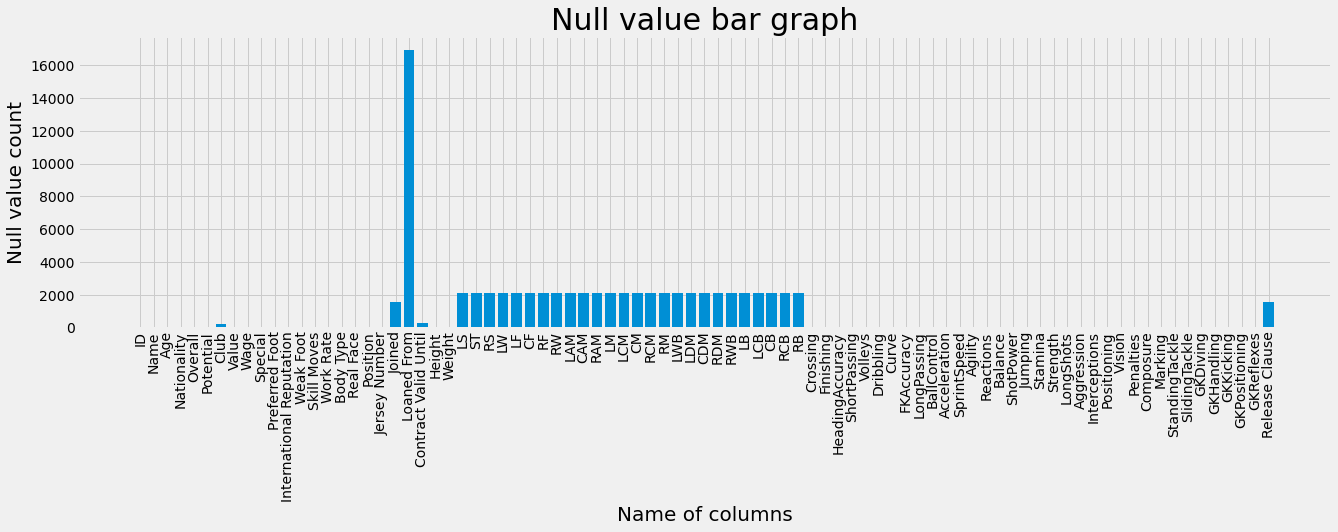

In [11]:
plt.figure(figsize=(20,5))
plt.title("Null value bar graph", fontdict={"fontsize": 30})
# plt.plot(nan_df)
plt.bar(names, nan_df)
plt.xticks(rotation=90)
plt.xlabel("Name of columns", fontdict={"fontsize":20})
plt.ylabel("Null value count", fontdict={"fontsize":20})
plt.show()

In [ ]:
"League" in df1.columns

# **1) Overall total clubs and countries in the world**

In [12]:
total_clubs = df1["Club"].unique()
total_countries = df1["Nationality"].unique()

print("Total number of clubs = ", len(total_clubs))
print("Total number of countries = ", len(total_countries))

Total number of clubs =  652
Total number of countries =  164


# **2) Number of clubs in each country**

In [13]:
# Number of clubs in each country
df1[["Club","Nationality"]]

,Club,Nationality
0,FC Barcelona,Argentina
1,Juventus,Portugal
2,Paris Saint-Germain,Brazil
3,Manchester United,Spain
4,Manchester City,Belgium
...,...,...
18202,Crewe Alexandra,England
18203,Trelleborgs FF,Sweden
18204,Cambridge United,England
18205,Tranmere Rovers,England


In [17]:
number_of_clubs = []
for country in countries_names:
    print(country," = ",len(df1.loc[df1["Nationality"] == country]))
    number_of_clubs.append(len(df1.loc[df1["Nationality"] == country]))

Argentina  =  937
Portugal  =  322
Brazil  =  827
Spain  =  1072
Belgium  =  260
Croatia  =  126
Uruguay  =  149
Slovenia  =  55
Poland  =  350
Germany  =  1198
France  =  914
England  =  1662
Italy  =  702
Egypt  =  31
Colombia  =  618
Denmark  =  336
Gabon  =  15
Wales  =  129
Senegal  =  130
Costa Rica  =  30
Slovakia  =  54
Netherlands  =  453
Bosnia Herzegovina  =  61
Morocco  =  85
Serbia  =  126
Algeria  =  60
Austria  =  298
Greece  =  102
Chile  =  391
Sweden  =  397
Korea Republic  =  335
Finland  =  67
Guinea  =  31
Montenegro  =  23
Armenia  =  10
Switzerland  =  220
Norway  =  341
Czech Republic  =  100
Scotland  =  286
Ghana  =  114
Central African Rep.  =  3
DR Congo  =  52
Ivory Coast  =  100
Russia  =  79
Ukraine  =  73
Iceland  =  47
Mexico  =  366
Jamaica  =  32
Albania  =  40
Venezuela  =  67
Japan  =  478
Turkey  =  303
Ecuador  =  43
Paraguay  =  85
Mali  =  43
Nigeria  =  121
Cameroon  =  90
Dominican Republic  =  2
Israel  =  14
Kenya  =  10
Hungary  =  38
Repub

In [18]:
club_per_country = pd.DataFrame(countries_names, number_of_clubs, columns=["Country"])
club_per_country.reset_index(inplace=True)

In [19]:
club_per_country.columns = ["Number of Clubs", "Country"]

In [20]:
#ANSWER
club_per_country

,Number of Clubs,Country
0,937,Argentina
1,322,Portugal
2,827,Brazil
3,1072,Spain
4,260,Belgium
...,...,...
159,1,Malta
160,1,Belize
161,1,South Sudan
162,1,Indonesia


In [ ]:
plt.figure(figsize=(30,50))

sns.barplot(y = club_per_country["Country"], x = club_per_country["Number of Clubs"])
plt.title("NUMBER OF CLUBS PER COUNTRY", fontdict={"fontsize":40})
plt.xlabel("Number of clubs", fontdict={"fontsize":40})
plt.ylabel("Name of countries", fontdict={"fontsize":40})
plt.yticks(fontsize='x-large')
plt.show()

# **3) Country having minimum and maximum number of football club**

In [ ]:
max_club_number = club_per_country["Number of Clubs"].idxmax()

min_club_number = club_per_country["Number of Clubs"].idxmin()

print("Max number of club is in = {} = {}"
      .format(club_per_country["Country"].iloc[max_club_number], 
              club_per_country["Number of Clubs"].iloc[max_club_number]))

In [ ]:
#THERE ARE SEVERAL COUNTRIES WITH MINIMUM NUMBER OF CLUBS SO idxmin() ALONE WON'T WORK.
min_club_country  = club_per_country.loc[club_per_country["Number of Clubs"] == 1]
min_club_country.columns = ["Club counts", "Country with minimum clubs"] 
min_club_country 

In [ ]:
print("""There are altogether {} countries with only {} football club."""
      .format(len(min_club_country["Country with minimum clubs"]), 1))

# **4) Which country has the most number of football players?**

In [ ]:
countries_names

In [ ]:
total_player_per_country = []

for country in countries_names:
    #print(country,"",len(df1.loc[df1["Nationality"] == country][["Name","Nationality"]]))
    total_player_per_country.append((country,len(df1.loc[df1["Nationality"] == country][["Name","Nationality"]])))
total_player_per_country    

In [ ]:
total_player_per_country = pd.DataFrame(total_player_per_country)
total_player_per_country.columns = ["Country", "Total Players"]
total_player_per_country.head()

In [ ]:
max_country = total_player_per_country["Total Players"].idxmax()
max_country

In [ ]:
total_player_per_country.iloc[max_country]

In [ ]:
#ANSWER
print("{} has the maximum number of football player = {}"
      .format(total_player_per_country["Country"].iloc[max_country],
              total_player_per_country["Total Players"].iloc[max_country]
             )
     )

In [ ]:
#ANSWER
plt.figure(figsize=(20,40))
plt.yticks(rotation=0, fontsize=14)
plt.title("Country with the most number of football players", size=40)
sns.barplot(y = total_player_per_country["Country"], x = total_player_per_country["Total Players"])

In [ ]:
df1.head()

# **5) The most expensive player**

In [ ]:
expensive_df = df1[["Name", "Age", "Nationality", "Club", "Value", "Wage"]]
expensive_df.head()

In [ ]:
#VALUE WISE EXPENSIVE PLAYER
value_exp_player = expensive_df["Value"].idxmax()
value_exp_player

exp_player_value = expensive_df.iloc[value_exp_player,:]
exp_player_value

In [ ]:
#WAGE WISE EXPENSIVE PLAYER
wage_exp_player = expensive_df["Wage"].idxmax()
wage_exp_player

exp_player_wage = expensive_df.iloc[wage_exp_player, :]
exp_player_wage

In [ ]:
expensive_df.loc[  
    (expensive_df["Value"] == expensive_df["Value"].max()) 
    &
    (expensive_df["Wage"] == expensive_df["Wage"].max())
]
#SO THERE ARE NO PLAYER HAVING BOTH MAXIMUM VALUE OF VALUE AND WAGE

# **The Youngest and the Oldest player**

In [ ]:
df1.head()

In [ ]:
#CHECKING THE DATATYPE OF AGE
df1["Age"].dtype

In [ ]:
#THE YOUNGEST PLAYER
youngest_player_idxmin = df1["Age"].idxmin()
youngest_player_idxmin

df1.iloc[youngest_player_idxmin,:][["ID","Name","Age","Nationality"]]

In [ ]:
#THE OLDEST PLAYER
oldest_player_idxmax = df1["Age"].idxmax()
oldest_player_idxmax

df1.iloc[oldest_player_idxmax,:][["ID","Name","Age","Nationality"]]

# **Middle aged players**

In [ ]:
middle_aged_player = []

for age in df1["Age"]:
    if age in np.arange(30,40,1):
        middle_aged_player.append(age)
print("Total middle aged football player = ", len(middle_aged_player))

# **Middle aged player per country**

In [ ]:
df1.head()

In [ ]:
list_of_middle_age = np.arange(30,40,1)
list_of_middle_age

middle_age_dict = {}

for middle_age in list_of_middle_age:
    #print(df1.loc[df1["Age"] == middle_age][["Name", "Age"]])
    middle_age_dict[middle_age] = df1.loc[df1["Age"] == middle_age][["Name", "Age", "Nationality"]]

age_value = input("Enter an age for filtering players by age:")   
middle_age_dict[int(age_value)]

In [ ]:
each_country_mid_age = {}

for country in countries_names:
    only_one_country = df1.loc[df1["Nationality"] == country][["Name","Age","Nationality"]]
    # only_one_country.head()
    
    each_country_mid_age[country] = len(only_one_country.loc[
                                                (only_one_country["Age"]>=30)
                                                &
                                                (only_one_country["Age"]<=39)
                                            ]
                                       )
each_country_mid_age

In [ ]:
#CROSS CHECKING FOR FINDING TOTAL MIDDLE AGED PLAYERS PER COUNTRY
# x = df1.loc[df1["Nationality"] == "Belgium"] [["Name", "Age", "Nationality"]]
# x.head()
# len(x.loc[(x["Age"]>=30) & (x["Age"]<=39)])

In [ ]:
each_country_mid_age_df = pd.DataFrame(each_country_mid_age, index=[1]).T
each_country_mid_age_df = each_country_mid_age_df.reset_index()
each_country_mid_age_df.columns = ["Country","Number of middle aged player"]
each_country_mid_age_df

In [ ]:
#ANSWER
plt.figure(figsize=(30,60))

sns.set_context('poster', font_scale=1)
sns.barplot(y=each_country_mid_age_df["Country"], x=each_country_mid_age_df["Number of middle aged player"])    

plt.xlabel("Number of middle aged players", fontdict={"fontsize":40}) 
plt.ylabel("Countries", fontdict={"fontsize":40})
plt.title("Middle aged player (30 - 39) per country", fontdict={"fontsize":50})

From above bar graph we can conclude that there are some countries where there are no middle aged players. I.e. the players are either younger or older and not the middle aged. Those countries in above graph having no bar at all are the one having no middle aged players.

In [ ]:
df1.head()

In [ ]:
all_columns = [column for column in df1.columns]
all_columns